# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 565


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
url = f"{base_url}appid={weather_api_key}&units={units}&q="


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | quang ngai
Processing Record 2 of Set 1 | west island
Processing Record 3 of Set 1 | filipstad
Processing Record 4 of Set 1 | sisimiut
Processing Record 5 of Set 1 | fuvahmulah
City not found. Skipping...
Processing Record 6 of Set 1 | cockburn town
Processing Record 7 of Set 1 | wailua homesteads
Processing Record 8 of Set 1 | pierre
Processing Record 9 of Set 1 | nizhneangarsk
Processing Record 10 of Set 1 | numan
Processing Record 11 of Set 1 | iqaluit
Processing Record 12 of Set 1 | mount gambier
Processing Record 13 of Set 1 | quthing
Processing Record 14 of Set 1 | vanimo
Processing Record 15 of Set 1 | udachny
Processing Record 16 of Set 1 | college
Processing Record 17 of Set 1 | port-aux-francais
Processing Record 18 of Set 1 | chonchi
Processing Record 19 of Set 1 | lorengau
Processing Record 20 of Set 1 | la ronge
Processing Record 21 of Set 1 | n'zeto
Processing Record 22 of Set 1 | v

Processing Record 40 of Set 4 | hawaiian paradise park
Processing Record 41 of Set 4 | saldanha
Processing Record 42 of Set 4 | seminole
Processing Record 43 of Set 4 | rozhniv
Processing Record 44 of Set 4 | igarka
Processing Record 45 of Set 4 | badger
Processing Record 46 of Set 4 | maria la baja
Processing Record 47 of Set 4 | damongo
City not found. Skipping...
Processing Record 48 of Set 4 | touros
Processing Record 49 of Set 4 | strelka
Processing Record 0 of Set 5 | tot'ma
Processing Record 1 of Set 5 | enewetak
Processing Record 2 of Set 5 | gokceada
Processing Record 3 of Set 5 | kirensk
Processing Record 4 of Set 5 | ploneour-lanvern
Processing Record 5 of Set 5 | bodo
Processing Record 6 of Set 5 | olyokminsk
Processing Record 7 of Set 5 | kavieng
Processing Record 8 of Set 5 | tura
Processing Record 9 of Set 5 | aswan
Processing Record 10 of Set 5 | lamu
Processing Record 11 of Set 5 | naze
Processing Record 12 of Set 5 | madang
Processing Record 13 of Set 5 | st. john's
P

City not found. Skipping...
Processing Record 31 of Set 8 | mazagao
Processing Record 32 of Set 8 | borovskoy
Processing Record 33 of Set 8 | sur
Processing Record 34 of Set 8 | vila velha
Processing Record 35 of Set 8 | filey
Processing Record 36 of Set 8 | happy valley-goose bay
Processing Record 37 of Set 8 | puerto baquerizo moreno
Processing Record 38 of Set 8 | queenstown
Processing Record 39 of Set 8 | kanker
Processing Record 40 of Set 8 | ape
Processing Record 41 of Set 8 | masaki-cho
Processing Record 42 of Set 8 | harper
Processing Record 43 of Set 8 | khao yoi
Processing Record 44 of Set 8 | bich'vinta
Processing Record 45 of Set 8 | changji
Processing Record 46 of Set 8 | ancud
Processing Record 47 of Set 8 | coyhaique
Processing Record 48 of Set 8 | qujing
Processing Record 49 of Set 8 | urucuca
Processing Record 0 of Set 9 | broken hill
Processing Record 1 of Set 9 | port douglas
Processing Record 2 of Set 9 | porto novo
Processing Record 3 of Set 9 | al muwayh
Processin

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          537
Lat           537
Lng           537
Max Temp      537
Humidity      537
Cloudiness    537
Wind Speed    537
Country       537
Date          537
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,quang ngai,15.1167,108.8000,22.76,93,33,1.18,VN,1701816301
1,west island,-12.1568,96.8225,25.99,83,40,2.57,CC,1701816302
2,filipstad,59.7124,14.1683,-14.01,95,15,0.92,SE,1701816302
3,sisimiut,66.9395,-53.6735,-10.53,77,18,5.13,GL,1701816302
4,cockburn town,21.4612,-71.1419,27.30,78,6,6.30,TC,1701816068


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,quang ngai,15.1167,108.8000,22.76,93,33,1.18,VN,1701816301
1,west island,-12.1568,96.8225,25.99,83,40,2.57,CC,1701816302
2,filipstad,59.7124,14.1683,-14.01,95,15,0.92,SE,1701816302
3,sisimiut,66.9395,-53.6735,-10.53,77,18,5.13,GL,1701816302
4,cockburn town,21.4612,-71.1419,27.30,78,6,6.30,TC,1701816068


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

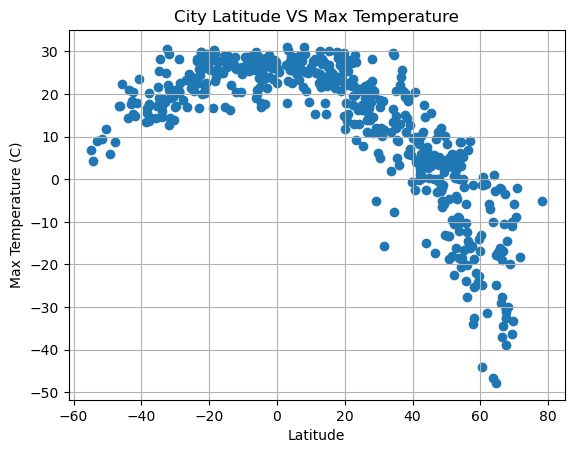

In [22]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'])

# Incorporate the other graph properties
plt.title(f"City Latitude VS Max Temperature")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

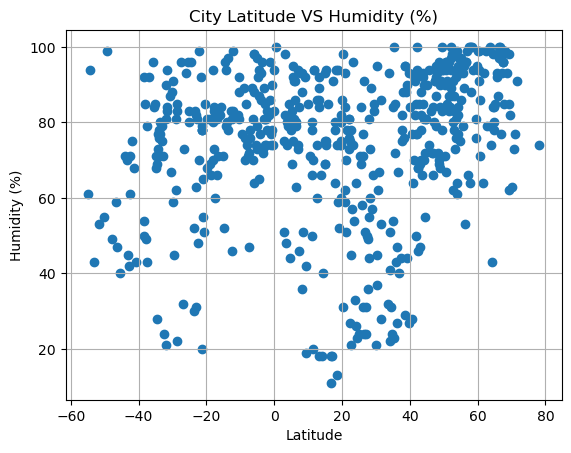

In [23]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'])

# Incorporate the other graph properties
plt.title(f"City Latitude VS Humidity (%)")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

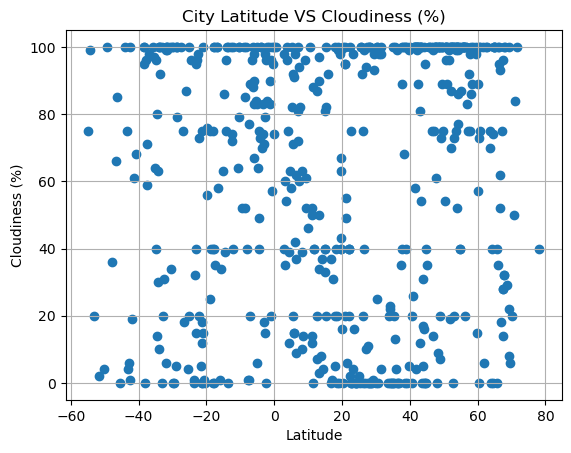

In [24]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.title(f"City Latitude VS Cloudiness (%)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

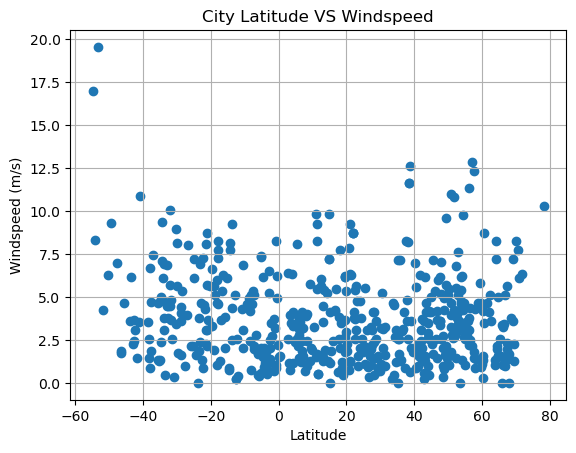

In [26]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.title(f"City Latitude VS Windspeed")
plt.xlabel('Latitude')
plt.ylabel('Windspeed (m/s)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [51]:
# Define a function to create Linear Regression plots
def lin_reg_func(df, param):
    x_values = df['Lat']
    y_values = df[param]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    print(f"The r-value is: {rvalue**2}")
    
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values,"r-")
    
    plt.xlabel('Latitude')
    plt.ylabel(param)
        
    return line_eq

In [29]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,quang ngai,15.1167,108.8000,22.76,93,33,1.18,VN,1701816301
2,filipstad,59.7124,14.1683,-14.01,95,15,0.92,SE,1701816302
3,sisimiut,66.9395,-53.6735,-10.53,77,18,5.13,GL,1701816302
4,cockburn town,21.4612,-71.1419,27.30,78,6,6.30,TC,1701816068
5,wailua homesteads,22.0669,-159.3780,27.24,81,40,8.75,US,1701816303


In [30]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,west island,-12.1568,96.8225,25.99,83,40,2.57,CC,1701816302
10,mount gambier,-37.8333,140.7667,17.74,49,96,0.88,AU,1701816128
11,quthing,-30.4000,27.7003,13.99,67,34,3.41,LS,1701816304
12,vanimo,-2.6741,141.3028,27.62,81,79,1.41,PG,1701816304
15,port-aux-francais,-49.3500,70.2167,5.90,99,100,9.28,TF,1701816305


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7401587270143494


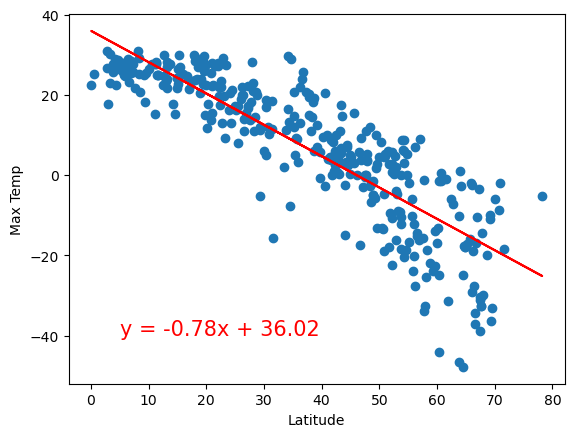

In [53]:
# Linear regression on Northern Hemisphere

tempvslat_N = lin_reg_func(northern_hemi_df,'Max Temp')

plt.annotate(tempvslat_N,(5,-40),fontsize=15,color="red")
plt.show()

The r-value is: 0.47207346148085855


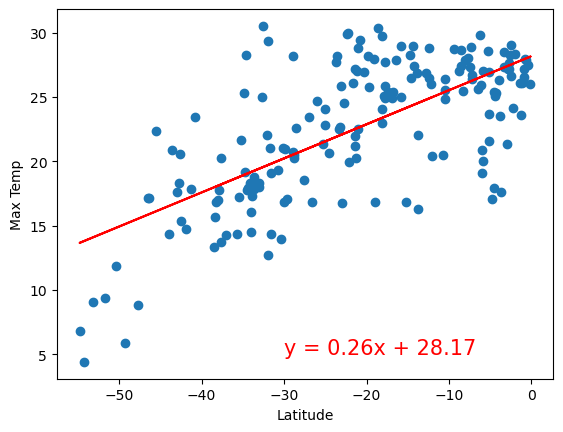

In [55]:
# Linear regression on Southern Hemisphere
tempvslat_S = lin_reg_func(southern_hemi_df,'Max Temp')

plt.annotate(tempvslat_S,(-30,5),fontsize=15,color="red")
plt.show()

**Discussion about the linear relationship:** 
The linear regression model for the Nothern Hemisphere is negative compared to the Southern Hemisphere. This suggests that the temperature decreases when moving away from the equator. The correlation between the temperature and nothern hemisphere is strong but the correlation for the southern hemisphere is weak. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.11214009103896015


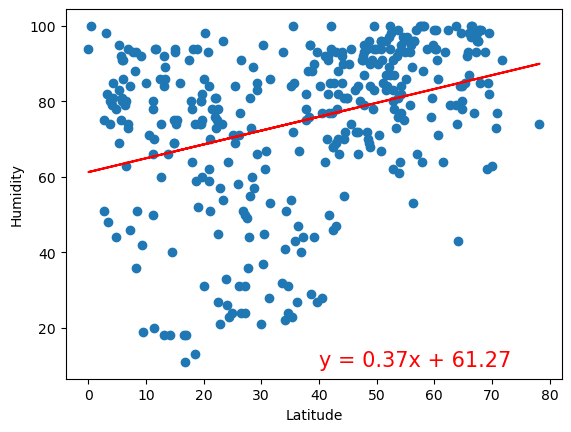

In [66]:
# Northern Hemisphere
humvslat_N = lin_reg_func(northern_hemi_df,'Humidity')

plt.annotate(humvslat_N,(40,10),fontsize=15,color="red")
plt.show()

The r-value is: 0.11967368502836301


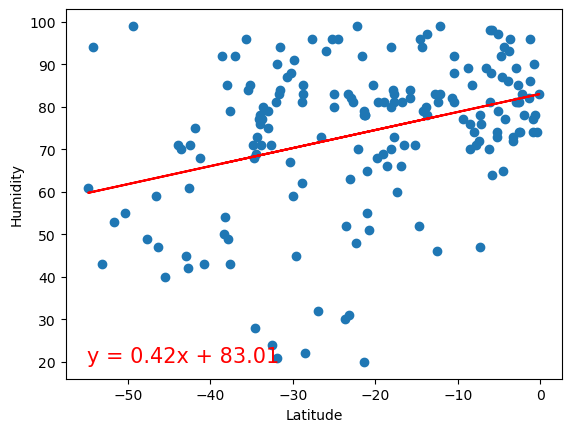

In [67]:
# Southern Hemisphere
humvslat_S = lin_reg_func(southern_hemi_df,'Humidity')

plt.annotate(humvslat_S,(-55,20),fontsize=15,color="red")
plt.show()

**Discussion about the linear relationship:** 
The scatter plot is all over the plot. The linear regression model doesnt seem to be accurate with these plots since the correlation is also extremely weak. Humidity does not seem to be related to the latitude in the nothern not the southern hemisphere.  

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.042617686103630106


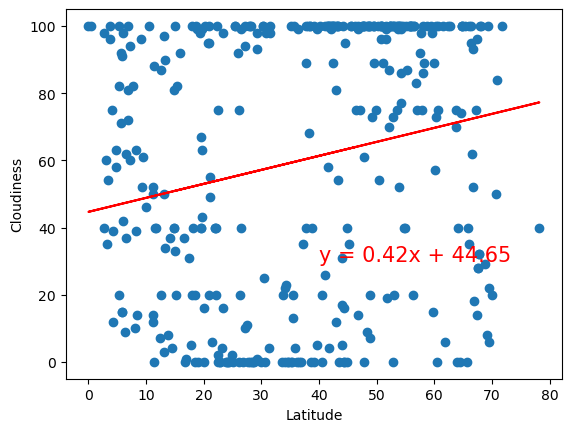

In [70]:
# Northern Hemisphere
cldvslat_N = lin_reg_func(northern_hemi_df,'Cloudiness')

plt.annotate(cldvslat_N,(40, 30),fontsize=15,color="red")
plt.show()

The r-value is: 0.015157550064378088


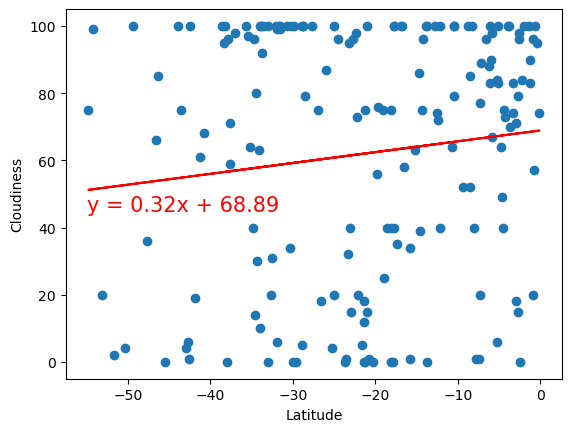

In [74]:
# Southern Hemisphere
cldvslat_S = lin_reg_func(southern_hemi_df,'Cloudiness')

plt.annotate(cldvslat_S,(-55, 45),fontsize=15,color="red")
plt.show()

**Discussion about the linear relationship:** 
The scatter points are all over the plot. The correlation is also extremely low which suggests that cloudiness is not related to the latitude. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.004024340958447285


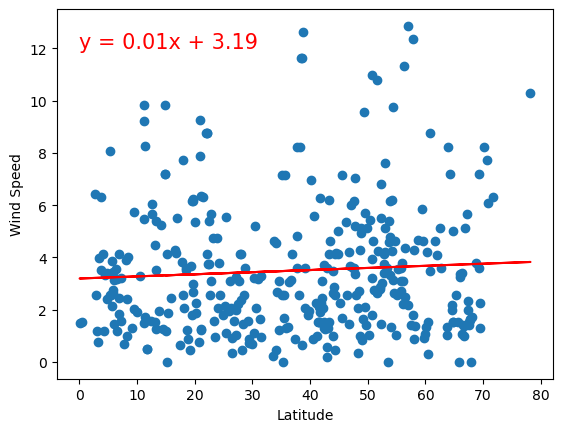

In [77]:
# Northern Hemisphere
windvslat_N = lin_reg_func(northern_hemi_df,'Wind Speed')

plt.annotate(windvslat_N,(0, 12),fontsize=15,color="red")
plt.show()

The r-value is: 0.10500947504112623


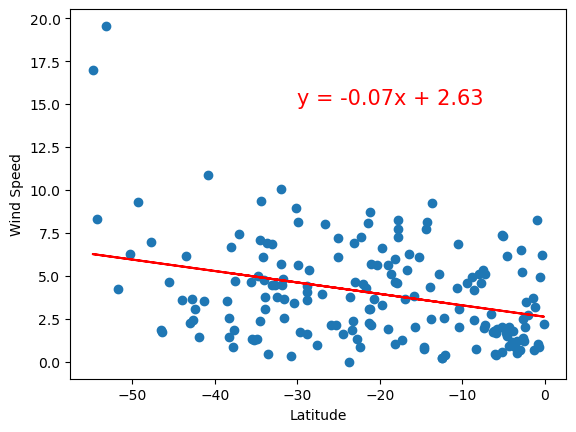

In [79]:
# Southern Hemisphere
windvslat_S = lin_reg_func(southern_hemi_df,'Wind Speed')

plt.annotate(windvslat_S,(-30, 15),fontsize=15,color="red")
plt.show()

**Discussion about the linear relationship:** 
There doesnt seem to be any direct correlation between wind speed and the latitude as the regression model is not accurate. However, it can be noticed that the extreme wind speeds occur in latitudes farthest away from the equator.
